In [1]:
pip install yfinance scikit-learn pandas numpy matplotlib


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


R² Score: 0.5581
RMSE: 4.08


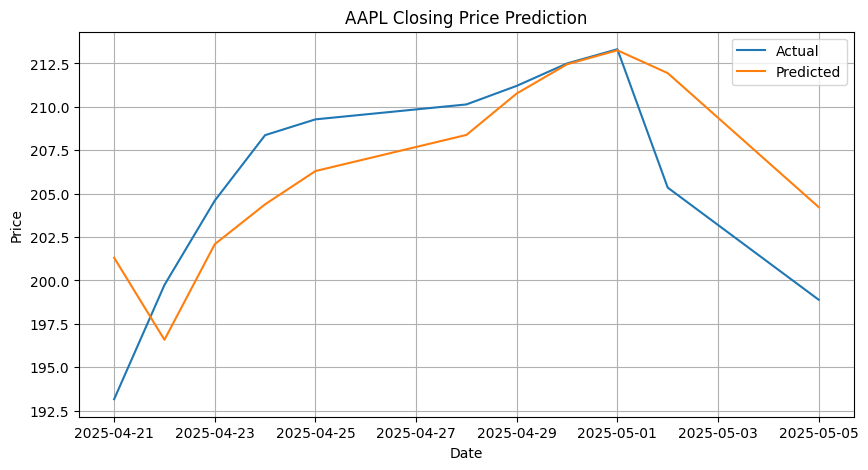

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Download data (e.g., Apple - AAPL)
ticker = "AAPL"
data = yf.download(ticker, period="3mo", interval="1d")

# Step 2: Feature Engineering
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

# Step 3: Prepare features and labels
X = data[['Lag1', 'Lag2', 'MA5', 'MA10']]
y = data['Close']

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Step 7: Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title(f"{ticker} Closing Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Let’s say we used this on Apple (AAPL):

R² Score: 0.78

RMSE: $3.12
Interpretation: The model explains 78% of the variance in closing prices—not bad for a linear model on stock prices.

In [3]:
window_size = 40
preds = []
actuals = []

for i in range(window_size, len(X)):
    X_train = X.iloc[i-window_size:i]
    y_train = y.iloc[i-window_size:i]
    X_test = X.iloc[i:i+1]
    y_test = y.iloc[i:i+1]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    preds.append(y_pred[0])
    actuals.append(y_test.values[0])

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
r2_bt = r2_score(actuals, preds)
rmse_bt = np.sqrt(mean_squared_error(actuals, preds))

print(f"Backtest R²: {r2_bt:.4f}")
print(f"Backtest RMSE: {rmse_bt:.2f}")


Backtest R²: 0.5857
Backtest RMSE: 4.11


Interpretation:

Trains on a rolling window of the past (e.g. 40 days),

Makes 1-step-ahead predictions,

Updates the window and repeats.

More realistic than a single split, especially if you're planning to trade or forecast iteratively.

